In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from datetime import datetime

In [2]:
df0 = pd.read_csv("meteo_202301-202304.csv", na_filter = True)
df1 = pd.read_csv("meteo_202109-202112.csv", na_filter = True)  
df2 = pd.read_csv("meteo_202201-202212.csv", na_filter = True) 

df3 = pd.read_csv("energia_202109-202112.csv", na_filter = False)
df4 = pd.read_csv("energia_202201-202212.csv", na_filter = False)
df5 = pd.read_csv("energia_202301-202304.csv", na_filter = False) 

In [3]:
# Concatenar os DataFrames df3 e df4 ao longo das linhas (eixo 0) 
# podemos fazer isto pois os dataset df3 e df4 têm os mesmos atributos
df_energia = pd.concat([df3, df4], ignore_index=True)

# aqui temos de especificar quais são os atributos a juntar pois o data df5 não tem todos atributos do df3 e do df4
df_energia= pd.merge(df_energia, df5, on=['Data','Hora','Normal (kWh)','Horario Economico (kWh)','Autoconsumo (kWh)'], how='outer')

# Exibir o DataFrame resultante
print(df_energia)
print("------------------------------------------------------------------------------------------------------------------------")
# Exibir o atributo Injecao na rede (kWh)
print(df_energia['Injecao na rede (kWh)'].value_counts())
print("------------------------------------------------------------------------------------------------------------------------")
# Concatenar os DataFrames df0,df1 e df2 ao longo das linhas (eixo 0)
# podemos fazer isto pois os dataset df0, df1 e df2 têm os mesmos atributos
df_meteriologia = pd.concat([df0, df1,df2], ignore_index=True)

print(df_meteriologia)

             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0         0.000                    0.000   
1      2021-09-29     1         0.000                    0.000   
2      2021-09-29     2         0.000                    0.000   
3      2021-09-29     3         0.000                    0.000   
4      2021-09-29     4         0.000                    0.000   
...           ...   ...           ...                      ...   
13267  2023-04-04    19         0.953                    0.000   
13268  2023-04-04    20         0.915                    0.000   
13269  2023-04-04    21         0.479                    0.000   
13270  2023-04-04    22         0.000                    0.497   
13271  2023-04-04    23         0.000                    0.487   

       Autoconsumo (kWh) Injecao na rede (kWh)  
0                  0.000                  None  
1                  0.000                  None  
2                  0.000                  None  
3          

In [4]:
print ( df_energia.nunique() )
print("---------------------")
print ( df_meteriologia.nunique() )

Data                        553
Hora                         24
Normal (kWh)               1421
Horario Economico (kWh)     982
Autoconsumo (kWh)           808
Injecao na rede (kWh)         5
dtype: int64
---------------------
dt                     13440
dt_iso                 13440
city_name                  1
temp                    2611
feels_like              2872
temp_min                 508
temp_max                 572
pressure                  43
sea_level                  0
grnd_level                 0
humidity                  82
wind_speed               809
rain_1h                  386
clouds_all               101
weather_description        8
dtype: int64


In [5]:
# Converter a coluna 'dt_iso' para o formato datetime
df_meteriologia1 = df_meteriologia.copy()

df_meteriologia1['dt_iso'] = list ( map(lambda x:( datetime.strptime(x, "%Y-%m-%d %H:%M:%S %z %Z") ).strftime("%Y-%m-%d %H:%M:%S"), df_meteriologia1['dt_iso']) )
#print(df_meteriologia['dt_iso'])

df_meteriologia1['dt_iso'] = pd.to_datetime(df_meteriologia1['dt_iso'])

# Realizar a junção
df_final_v1 = pd.merge(df_energia, df_meteriologia1, left_on=['Data', 'Hora'], right_on=[df_meteriologia1['dt_iso'].dt.strftime('%Y-%m-%d'),df_meteriologia1['dt_iso'].dt.hour], how='outer')

# Exibir o DataFrame resultante
print(df_final_v1)


             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0           0.0                      0.0   
1      2021-09-29     1           0.0                      0.0   
2      2021-09-29     2           0.0                      0.0   
3      2021-09-29     3           0.0                      0.0   
4      2021-09-29     4           0.0                      0.0   
...           ...   ...           ...                      ...   
13939  2021-09-28    19           NaN                      NaN   
13940  2021-09-28    20           NaN                      NaN   
13941  2021-09-28    21           NaN                      NaN   
13942  2021-09-28    22           NaN                      NaN   
13943  2021-09-28    23           NaN                      NaN   

       Autoconsumo (kWh) Injecao na rede (kWh)            dt  \
0                    0.0                  None  1.632874e+09   
1                    0.0                  None  1.632877e+09   
2              

In [6]:
# Exibir o DataFrame resultante
print(df_final_v1.head())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v1.nunique())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v1['feels_like'].value_counts())

         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injecao na rede (kWh)            dt              dt_iso city_name   temp  \
0                  None  1.632874e+09 2021-09-29 00:00:00     local  13.97   
1                  None  1.632877e+09 2021-09-29 01:00:00     local  13.48   
2                  None  1.632881e+09 2021-09-29 02:00:00     local  12.93   
3                  None  1.632884e+09 2021-09-29 03:00:00     local  12.61   
4                  None  1.632888e+09 2021-09-29 04:00:00     local  12.61   

   ...  temp_min  temp_max  pressure  sea_le

<Axes: >

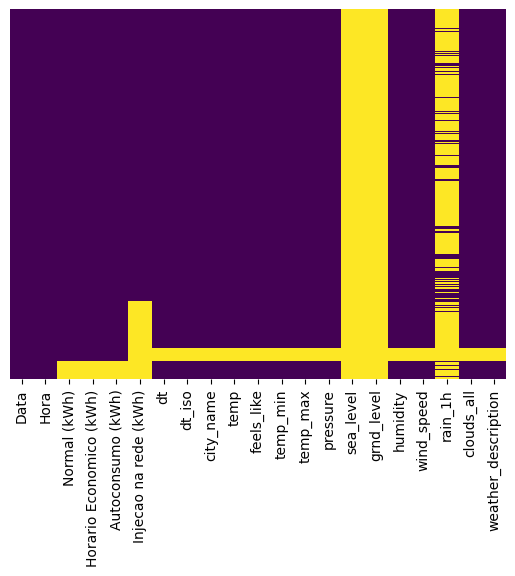

In [7]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df_final_v1.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [8]:
# Converter a coluna 'dt_iso' para o formato datetime
df_meteriologia2 = df_meteriologia.copy()

df_meteriologia2['dt_iso'] = list ( map(lambda x:( datetime.strptime(x, "%Y-%m-%d %H:%M:%S %z %Z") ).strftime("%Y-%m-%d %H:%M:%S"), df_meteriologia2['dt_iso']) )
#print(df_meteriologia['dt_iso'])

df_meteriologia2['dt_iso'] = pd.to_datetime(df_meteriologia2['dt_iso'])

# Realizar a junção
df_final_v2 = pd.merge(df_energia, df_meteriologia2, left_on=['Data', 'Hora'], right_on=[df_meteriologia2['dt_iso'].dt.strftime('%Y-%m-%d'), df_meteriologia2['dt_iso'].dt.hour], how='inner')

# Exibir o DataFrame resultante
print(df_final_v2)


             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0         0.000                    0.000   
1      2021-09-29     1         0.000                    0.000   
2      2021-09-29     2         0.000                    0.000   
3      2021-09-29     3         0.000                    0.000   
4      2021-09-29     4         0.000                    0.000   
...           ...   ...           ...                      ...   
12763  2023-03-14    19         0.329                    0.000   
12764  2023-03-14    20         0.401                    0.000   
12765  2023-03-14    21         0.670                    0.000   
12766  2023-03-14    22         0.000                    0.558   
12767  2023-03-14    23         0.000                    0.569   

       Autoconsumo (kWh) Injecao na rede (kWh)          dt  \
0                    0.0                  None  1632873600   
1                    0.0                  None  1632877200   
2                    

In [9]:
# Exibir o DataFrame resultante
print(df_final_v2.head())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v2.nunique())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v2['feels_like'].value_counts())

         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injecao na rede (kWh)          dt              dt_iso city_name   temp  ...  \
0                  None  1632873600 2021-09-29 00:00:00     local  13.97  ...   
1                  None  1632877200 2021-09-29 01:00:00     local  13.48  ...   
2                  None  1632880800 2021-09-29 02:00:00     local  12.93  ...   
3                  None  1632884400 2021-09-29 03:00:00     local  12.61  ...   
4                  None  1632888000 2021-09-29 04:00:00     local  12.61  ...   

   temp_min  temp_max  pre

<Axes: >

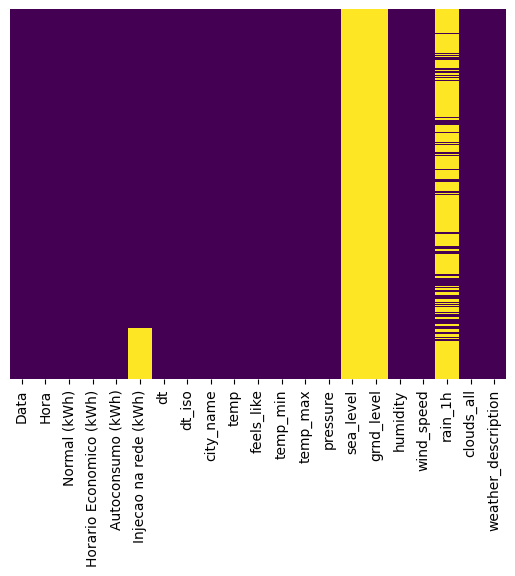

In [10]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df_final_v2.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

Escolhemos o inner

In [11]:
df = df_final_v2

In [12]:
# ver se existem linhas duplicadas se sim apager se não não fazer nada
print ( df.duplicated().sum() ) # não existem duplicadas por isso não fazemos nada

0


In [13]:
#apagar as colunas com sempre os mesmo elemento

print(df['city_name'].value_counts())
df.drop(['city_name'], inplace = True, axis = 1) # apaga-mos a coluna 'city_name'
df.head() #verificamos que a coluna não existe mais

city_name
local    12768
Name: count, dtype: int64


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,2021-09-29 00:00:00,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,2021-09-29 01:00:00,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,2021-09-29 02:00:00,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,2021-09-29 03:00:00,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,2021-09-29 04:00:00,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds


In [14]:
#apagar as colunas vazias

print(df['sea_level'].value_counts())
df.drop(['sea_level'], inplace = True, axis = 1) # apaga-mos a coluna 'sea_level'
df.head() #verificamos que a coluna não existe mais

Series([], Name: count, dtype: int64)


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,2021-09-29 00:00:00,13.97,13.54,11.45,14.04,1027,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,2021-09-29 01:00:00,13.48,13.02,13.43,13.90,1028,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,2021-09-29 02:00:00,12.93,12.47,12.72,13.43,1027,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,2021-09-29 03:00:00,12.61,12.15,10.34,12.93,1027,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,2021-09-29 04:00:00,12.61,12.17,9.79,12.93,1027,NaN,86,1.83,NaN,93,overcast clouds


In [15]:
#apagar as colunas vazias

print(df['grnd_level'].value_counts())
df.drop(['grnd_level'], inplace = True, axis = 1) # apaga-mos a coluna 'sea_level'
df.head() #verificamos que a coluna não existe mais

Series([], Name: count, dtype: int64)


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,2021-09-29 00:00:00,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,2021-09-29 01:00:00,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,2021-09-29 02:00:00,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,2021-09-29 03:00:00,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,2021-09-29 04:00:00,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds


In [16]:
# Corrigir o problema das colunas com NaN
df['Injecao na rede (kWh)'] = df['Injecao na rede (kWh)'].map(lambda x: 'None' if pd.isna(x) else x)

In [17]:
print(df['Injecao na rede (kWh)'].value_counts())

Injecao na rede (kWh)
None         9529
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64


In [18]:
print(df['rain_1h'].value_counts())
print('----------------------------------------------------------------------------------------------------------------')

# temos 10278 valores vazios para este dado
print(df[df['rain_1h'].isna()])

#subestituir os valores vazios por zero
df['rain_1h'] = df['rain_1h'].map(lambda x: 0 if pd.isna(x) else x)

rain_1h
0.12    73
0.15    61
0.16    59
0.14    58
0.11    56
        ..
3.31     1
1.93     1
3.39     1
3.52     1
2.06     1
Name: count, Length: 384, dtype: int64
----------------------------------------------------------------------------------------------------------------
             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0         0.000                    0.000   
1      2021-09-29     1         0.000                    0.000   
2      2021-09-29     2         0.000                    0.000   
3      2021-09-29     3         0.000                    0.000   
4      2021-09-29     4         0.000                    0.000   
...           ...   ...           ...                      ...   
12763  2023-03-14    19         0.329                    0.000   
12764  2023-03-14    20         0.401                    0.000   
12765  2023-03-14    21         0.670                    0.000   
12766  2023-03-14    22         0.000                    0.

<Axes: >

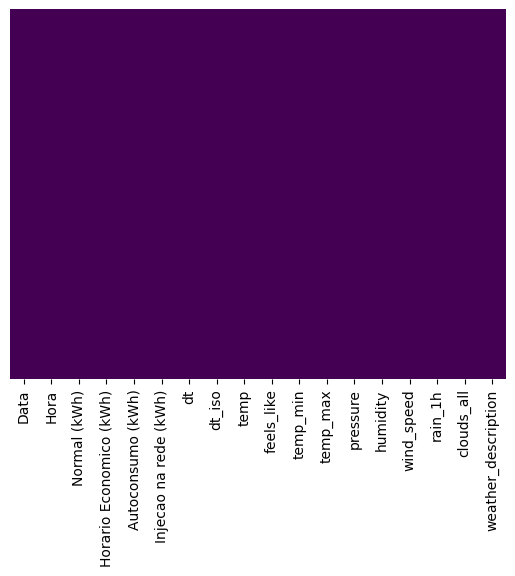

In [19]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df_final_v2.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     12768 non-null  object        
 1   Hora                     12768 non-null  int64         
 2   Normal (kWh)             12768 non-null  float64       
 3   Horario Economico (kWh)  12768 non-null  float64       
 4   Autoconsumo (kWh)        12768 non-null  float64       
 5   Injecao na rede (kWh)    12768 non-null  object        
 6   dt                       12768 non-null  int64         
 7   dt_iso                   12768 non-null  datetime64[ns]
 8   temp                     12768 non-null  float64       
 9   feels_like               12768 non-null  float64       
 10  temp_min                 12768 non-null  float64       
 11  temp_max                 12768 non-null  float64       
 12  pressure                 12768 n

In [21]:
df.drop(['Data'], inplace = True, axis = 1)
df.drop(['Hora'], inplace = True, axis = 1)

df['Year']   = df['dt_iso'].dt.year
df['Day']    = df['dt_iso'].dt.day
df['Month']  = df['dt_iso'].dt.month
df['Hour']   = df['dt_iso'].dt.hour
df['Minute'] = df['dt_iso'].dt.minute
df['Second'] = df['dt_iso'].dt.second

In [22]:
df.drop(['dt_iso'], inplace = True, axis = 1)

In [23]:
print ( df['weather_description'].value_counts() )

weather_description
sky is clear            3749
overcast clouds         2735
light rain              1961
broken clouds           1562
scattered clouds        1266
few clouds               801
moderate rain            627
heavy intensity rain      67
Name: count, dtype: int64


In [24]:
# Criar os atributos binários
df['sky is clear']             = ( df['weather_description'].str.contains('sky is clear') ).astype(int)
df['overcast clouds']          = ( df['weather_description'].str.contains('overcast clouds') ).astype(int)
df['light rain']               = ( df['weather_description'].str.contains('light rain') ).astype(int)
df['broken clouds']            = ( df['weather_description'].str.contains('broken clouds') ).astype(int)
df['scattered clouds']         = ( df['weather_description'].str.contains('scattered clouds') ).astype(int)
df['few clouds']               = ( df['weather_description'].str.contains('few clouds') ).astype(int)
df['moderate rain']            = ( df['weather_description'].str.contains('moderate rain') ).astype(int)
df['heavy intensity rain']     = ( df['weather_description'].str.contains('heavy intensity rain') ).astype(int)

In [25]:
df.drop(['weather_description'], inplace = True, axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             12768 non-null  float64
 1   Horario Economico (kWh)  12768 non-null  float64
 2   Autoconsumo (kWh)        12768 non-null  float64
 3   Injecao na rede (kWh)    12768 non-null  object 
 4   dt                       12768 non-null  int64  
 5   temp                     12768 non-null  float64
 6   feels_like               12768 non-null  float64
 7   temp_min                 12768 non-null  float64
 8   temp_max                 12768 non-null  float64
 9   pressure                 12768 non-null  int64  
 10  humidity                 12768 non-null  int64  
 11  wind_speed               12768 non-null  float64
 12  rain_1h                  12768 non-null  float64
 13  clouds_all               12768 non-null  int64  
 14  Year                  

In [27]:
df.nunique()

Normal (kWh)                1400
Horario Economico (kWh)      964
Autoconsumo (kWh)            796
Injecao na rede (kWh)          5
dt                         12768
temp                        2573
feels_like                  2840
temp_min                     501
temp_max                     567
pressure                      43
humidity                      82
wind_speed                   809
rain_1h                      385
clouds_all                   101
Year                           3
Day                           31
Month                         12
Hour                          24
Minute                         1
Second                         1
sky is clear                   2
overcast clouds                2
light rain                     2
broken clouds                  2
scattered clouds               2
few clouds                     2
moderate rain                  2
heavy intensity rain           2
dtype: int64

In [29]:
for col in df:
    
    print (df[col].value_counts())
    print("----------------------------------------------------------------")

Normal (kWh)
0.000    6940
0.001      24
0.006      19
0.008      19
0.007      19
         ... 
1.278       1
2.108       1
1.405       1
1.043       1
1.943       1
Name: count, Length: 1400, dtype: int64
----------------------------------------------------------------
Horario Economico (kWh)
0.000    7835
0.263      40
0.256      36
0.321      31
0.260      30
         ... 
1.380       1
2.613       1
1.699       1
0.972       1
1.184       1
Name: count, Length: 964, dtype: int64
----------------------------------------------------------------
Autoconsumo (kWh)
0.000    6679
0.001      75
0.002      64
0.004      53
0.003      43
         ... 
0.556       1
0.658       1
1.085       1
0.998       1
0.529       1
Name: count, Length: 796, dtype: int64
----------------------------------------------------------------
Injecao na rede (kWh)
None         9529
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64
--------------------------------